<a href="https://colab.research.google.com/github/ChaeyeonHan/ML_Study/blob/main/%EC%9D%B4%EC%A7%84%EB%B6%84%EB%A5%98(%EC%9C%A0%EB%B0%A9%EC%95%94_%EB%8D%B0%EC%9D%B4%ED%84%B0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 유방암 데이터 세트 이진분류하기

In [ ]:
from sklearn.datasets import load_breast_cancer  # 사이킷런에 포함된 유방암 데이터세트 이용
cancer = load_breast_cancer()

print(cancer.data.shape, cancer.target.shape)  # 569개의 샘플과 30개의 특성이 있음

(569, 30) (569,)


In [ ]:
cancer.data[:3]  # 처음 3개의 샘플 출력

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

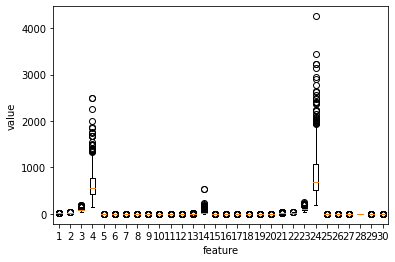

In [ ]:
# 특성이 많으므로, 박스플롯을 사용하여 각 특성의 사분위 값을 표현
import numpy as np
import matplotlib.pyplot as plt 
plt.boxplot(cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()  # 4, 14, 24번째 특성이 다른 특성보다 값의 분포가 크다는 점 발견 => 각 인덱스의 특징을 확인해보자

In [ ]:
cancer.feature_names[[3,13,23]]  # 모두 넓이와 관련된 특성

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [ ]:
# 타깃 데이터 확인
# target안에는 0과 1만 존재하므로, 값을 찾아 반환 -> unique함수 사용
np.unique(cancer.target, return_counts=True)  # 현재 데이터 셋에 212개의 음성 클래스(정상), 357개의 양성 클래스(종양)이 있다. 

(array([0, 1]), array([212, 357]))

### 성능평가를 위해 나누기
만든 모델의 성능을 평가하기 위해서 성능평가 과정을 거쳐야 한다. 훈련 데이터 세트로 학습된 모델을 다시 훈련 데이터 세트로 평가하면, 
모델이 훈련 데이터세트를 외워버리는 경우가 발생해 평가가 의미없어진다. 

-> 훈련 데이터 세트를 1. 훈련세트(training set) 2. 테스트세트(test set)

-> train_test_split()함수는 훈련세트를 75%, 테스트세트를 25%로 나눠준다.


In [ ]:
x = cancer.data
y = cancer.target  # 훈련 데이터 저장하기

In [ ]:
from sklearn.model_selection import train_test_split  # 훈련 데이터 세트 나누기

stratify = y : 훈련데이터를 나눌때 클래스의 비율을 동일하게 맞춰준다. (train_test_split()함수를 이용하지만 일부 불균형일 경우 사용함)

test_size = 0.2 : 테스트세트를 20%로 나눠준다는 의미


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)
print(x_train.shape, x_test.shape)  # 훈련세트와 테스트세트가 약 4:1로 나누어졌다. (455:114)

(455, 30) (114, 30)


In [ ]:
np.unique(y_train, return_counts=True)  # 훈련 세트의 타깃 확인하기 (전체 훈련 데이터세트의 클래스 비율과 유사)

(array([0, 1]), array([170, 285]))

In [ ]:
# 로지스틱 회귀 구현

class LogisticNeuron:

  def __init__(self):  # 미리 초기화X
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b  # 직선의 방정식 계산(배열 요소끼리 계산)  y = wx + b
    return z

  def backprop(self, x, err):  # 가중치와 절편에 대한 gradient 계산
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  # 여기까지 로지스틱 뉴런 구현됨. 이제 훈련과 예측.

  # 훈련 메소드 구현
  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])  # 가중치 초기화
    self.b = 0  # 절편 초기화
    for i in range(epochs):
      for x_i, y_i in zip(x, y):
        z = self.forpass(x_i)  # 정방향 계산
        a = self.activation(z)  # 활성화 함수 적용
        err = -(y_i - a)  # 오차계산
        w_grad, b_grad = self.backprop(x_i, err) # 역방향 계산
        self.w -= w_grad  # 가중치 업데이트
        self.b -= b_grad  # 절편 업데이트

  def activation(self, z):
    a = 1 / (1 + np.exp(-z))  # 시그모이드 함수 적용
    return a

    # 예측 메소드
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형함수
    a = self.activation(np.array(z))  # 활성화함수
    return a > 0.5  # 계단함수 적용

In [ ]:
# 모델 훈련하고 평가하기
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)  # fit메소드 호출

#  https://www.statology.org/runtimewarning-overflow-encountered-in-exp/
# RuntimeWarning: overflow encountered in exp 에 대한 해결법 (내가 작성한 코드에서 다루기엔 수가 너무 커서 발생하는 경고문구)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


In [ ]:
np.mean(neuron.predict(x_test) == y_test)  # 82프로의 정확도

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp


0.8245614035087719

### 단일층 신경망 클래스

In [32]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
x = cancer.data
y = cancer.target
x_train_all, x_test, y_train_all, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state = 42)

In [39]:
x_train, x_val, y_train, y_val = train_test_split(x_train_all, y_train_all, stratify=y_train_all, test_size=0.2, random_state=42)

In [40]:
class SingleLayer:
  def __init__(self):
    self.w = None
    self.b = None
  
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b  # 직선의 방정식 계산(배열 요소끼리 계산)  y = wx + b
    return z

  def backprop(self, x, err):  # 가중치와 절편에 대한 gradient 계산
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), 1]
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    for i in range(epochs):
      loss = 0
      indexes = np.random.permutation(np.arange(len(x)))  # 인덱스 섞어주기
      for i in indexes:
        z = self.forpass(x[i])  # 정방향 계산
        a = self.activation(z)  # 활성화 함수
        err = -(y[i] - a)  # 오차계산해서 
        w_grad, b_grad = self.backprop(x[i], err)
        self.w -= w_grad  # 가중치 업데이트 시켜주기
        self.b -= b_grad
        a = np.clip(a, 1e-10, 1-1e-10)
        loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
    
    self.losses.append(loss/len(y))  # 평균손실 저장

  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형함수
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)

### 데이터 전처리
- 특성의 스케일이 서로 다른 데이터를 이용하여 모델을 
훈련시킬때 가중치의 변화 알아보기




['mean perimeter' 'mean area']


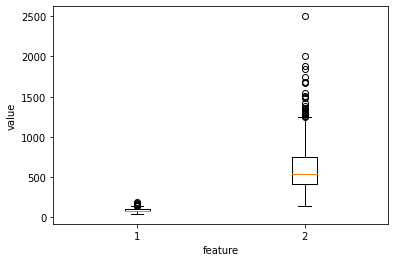

In [41]:
# 두 특성의 스케일 확인 -> 스케일 차이가 많이난다. 
print(cancer.feature_names[[2,3]])
plt.boxplot(x_train[:, 2:4])
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [42]:
# 스케일이 다른 두 특성에 경사하강법 알고리즘 적용
# learning_rate : 학습률(가중치의 업데이트 양 조절) => 주로 0.1, 0.01 등의 로그스케일로 지정
class SingleLayer:
  def __init__(self, learning_rate = 0.1):
    self.w = None
    self.b = None
    self.losses = []
    self.w_history = []
    self.lr = learning_rate

  def fit(self, x, y, epochs=100):
    self.w = np.ones(x.shape[1])
    self.b = 0
    self.w_history.append(self.w.copy())
    # w_history에 변경된 가중치가 모두 저장되어 있음
    np.random.seed(42)
    for i in range(epochs):
        loss = 0
        indexes = np.random.permutation(np.arange(len(x)))  # 인덱스 섞어주기
        for i in indexes:
          z = self.forpass(x[i])  # 정방향 계산
          a = self.activation(z)  # 활성화 함수
          err = -(y[i] - a)  # 오차계산해서 
          w_grad, b_grad = self.backprop(x[i], err)
          self.w -= self.lr * w_grad  # 가중치 업데이트 시켜주기
          self.b -= b_grad
          self.w_history.append(self.w.copy())  #가중치 append시켜서 저장해주기
          a = np.clip(a, 1e-10, 1-1e-10)
          loss += -(y[i]*np.log(a)+(1-y[i])*np.log(1-a))
        self.losses.append(loss/len(y))  # 평균손실 저장
  def forpass(self, x):
    z = np.sum(x * self.w) + self.b  # 직선의 방정식 계산(배열 요소끼리 계산)  y = wx + b
    return z

  def backprop(self, x, err):  # 가중치와 절편에 대한 gradient 계산
    w_grad = x * err
    b_grad = 1 * err
    return w_grad, b_grad
  
  def add_bias(self, x):
    return np.c_[np.ones((x.shape[0], 1)), 1]
  
  def activation(self, z):
    a = 1 / (1 + np.exp(-z))
    return a
  
  def predict(self, x):
    z = [self.forpass(x_i) for x_i in x]  # 선형함수
    return np.array(z) > 0
  
  def score(self, x, y):
    return np.mean(self.predict(x) == y)


스케일 조정하지 않은 훈련세트로 모델 훈련하고 성능점수 확인 -> 91점

In [43]:
layer1 = SingleLayer()
layer1.fit(x_train, y_train)
layer1.score(x_val, y_val)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp


0.9120879120879121

- mean perimeter은 주로 100~200 사이에 위치한 값 (w2)
- mean area는 200~2000사이에 위치한 값 (w3)
- mean area의 스케일이 훨씬 크므로, w3이 학습과정에서 큰 폭으로 변화함

- 이를 w3에 대한 그레이디언트가 크기 때문에 w3축을 따라 가중치가 크게 움직인다. 라고 표현함
- 가중치의 최적값에 도달하는 동안 w3가 크게 변하므로 모델이 불안정하게 수렴한다. 

 = 스케일을 조정해주어야한다. 
  -> 스케일 조정방법 중 하나인 표준화(standardization)를 사용

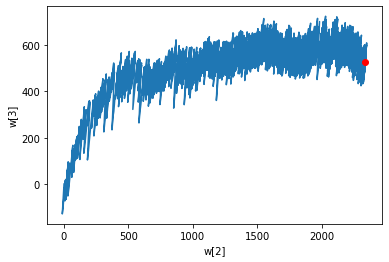

In [46]:
# w2, w3는 각각 mean perimeter, mean area의 특성에 관한 가중치.

w2=[]
w3=[]
for w in layer1.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

- 표준화는 사이킷런의 StandardScaler 클래스에 존재하지만, 직접 구현해보기
- 표준화 : 특성값에서 평균을 빼고, 표준편차로 나누기


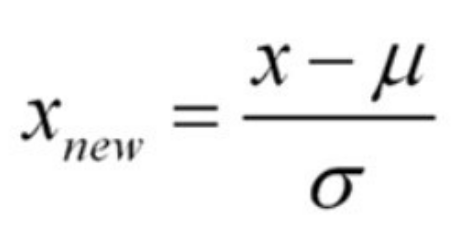

In [47]:
train_mean = np.mean(x_train, axis = 0)  # 평균 구하기
train_std = np.std(x_train, axis = 0)  # 표준편차 구하기
x_train_scaled = (x_train - train_mean) / train_std   # 표준화해주기

- 이전의 그래프와는 다르게, w2와 w3의 변화 비율이 비슷하기 때문에 가중치가 대각선 방향으로 이동했다. 
- 두 특성의 스케일을 비슷하게 맞추었으므로 최적값에 빠르게 도달함
- 경사하강법에서는 특성의 스케일을 맞추어주는 과정이 중요!

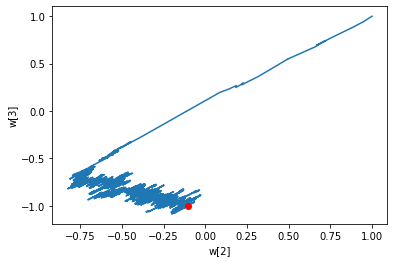

In [49]:
# 모델 훈련하기
layer2 = SingleLayer()
layer2.fit(x_train_scaled, y_train)
w2=[]
w3=[]
for w in layer2.w_history:
  w2.append(w[2])
  w3.append(w[3])

plt.plot(w2, w3)
plt.plot(w2[-1], w3[-1], 'ro')
plt.xlabel('w[2]')
plt.ylabel('w[3]')
plt.show()

- 하지만 성능평가가 매우 낮게 나왔음

=> 훈련세트와 검증세트의 스케일이 비슷할 것이라고 기대하지만, 검증세트의 스케일을 바꾸지 않았기에 성능이 좋지 않게 나온다.

In [51]:
# 모델의 성능평가
layer2.score(x_val, y_val)

0.37362637362637363

In [53]:
# 검증세트도 표준화 전처리 작업해주기(스케일 바꾸기)
val_mean = np.mean(x_val, axis=0)
val_std = np.std(x_val, axis=0)
x_val_scaled = (x_val - val_mean) / val_std
layer2.score(x_val_scaled, y_val)

0.967032967032967

스케일 조정 -> 유의할점
- 훈련세트와 검증세트가 다른 비율로 스케일이 조정되지 않도록


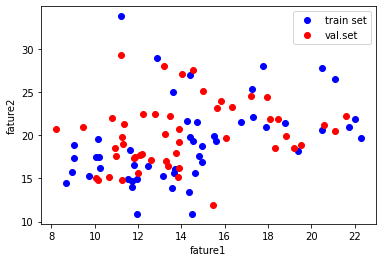

In [55]:
# 1. 원본 훈련세트와 검증세트
plt.plot(x_train[:50,0], x_train[:50,1], 'bo')
plt.plot(x_val[:50,0], x_val[:50,1], 'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val.set'])
plt.show()

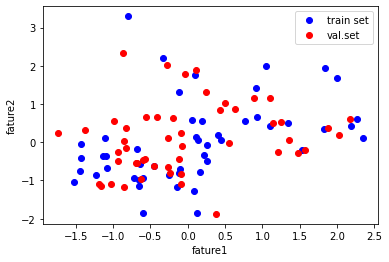

In [56]:
# 2. 전처리한 훈련세트와 검증세트
plt.plot(x_train_scaled[:50,0], x_train_scaled[:50,1], 'bo')
plt.plot(x_val_scaled[:50,0], x_val_scaled[:50,1], 'ro')
plt.xlabel('fature1')
plt.ylabel('fature2')
plt.legend(['train set', 'val.set'])
plt.show()

- 두 산점도를 비교해보면 점의 상대적인 위치가 변경되었음
- 전처리된 비율이 다르기 때문에
